The kingdom of Zion has cities connected by bidirectional roads. There is a unique path between any pair of cities. Morpheus has found out that the machines are planning to destroy the whole kingdom. If two machines can join forces, they will attack. Neo has to destroy roads connecting cities with machines in order to stop them from joining forces. There must not be any path connecting two machines.

Each of the roads takes an amount of time to destroy, and only one can be worked on at a time. Given a list of edges and times, determine the minimum time to stop the attack./

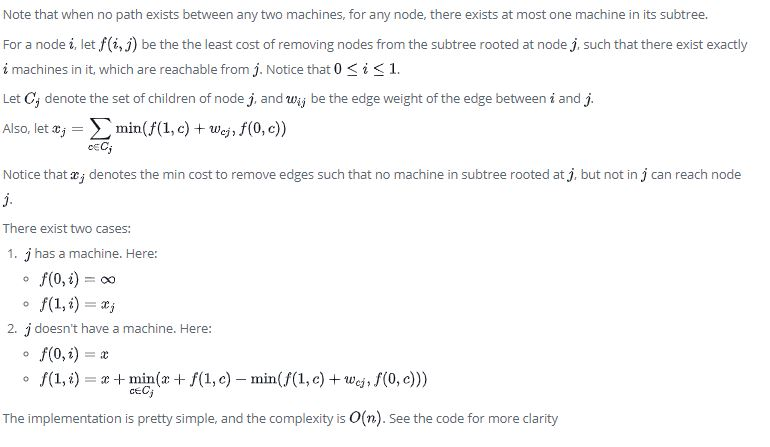

In [16]:
from IPython.display import Image
Image("C:/Users/sudhe/Desktop/temp/Capture.JPG")

In [ ]:
#!/usr/bin/python2.6
import sys
import copy

def read_input(f):
  n, k = f.readline().strip().split(' ')
  n, k = int(n), int(k)
  machines = set()
  connects = [{} for _ in xrange(n)]
  for line in f:
    tokens = line.strip().split(' ')
    if len(tokens) == 3:
      c1, c2, c = (int(token) for token in tokens)
      connects[c1][c2] = c
      connects[c2][c1] = c
    else:
      machines.add(int(tokens[0]))
  return (n, connects, k, machines)

def calculate_shortest_cuts_1(n, connects, k, machines):
  cities_to_process = set()
  for i in xrange(n):
    if len(connects[i]) == 1:
      cities_to_process.add(i)

  cost = 0
  to_remove = {}
  for c in cities_to_process:
    if c in to_remove: continue
    for x in connects[c]: c_parent = x

    # case 1, c not in machines
    # delete road between c and c_parent
    if not c in machines:
      to_remove[c] = c_parent
#      del connects[c_parent][c]
#      del connects[c][c_parent]
      continue

    # case 2, c in machines, c's parent in machines
    # delete road between c and c_parent and move it to cut list
    # remove c from machines
    if c_parent in machines:
      cost += connects[c_parent][c]
      to_remove[c] = c_parent
#      del connects[c_parent][c]
#      del connects[c][c_parent]
      machines.remove(c)
      continue

    # case 3, c in machines, c's parent not in machine and with degree 2
    # delete road between c and c_parent
    # update the cost of the road between c_parent and c_parent_parent
    if len(connects[c_parent]) == 2:
      min_cost = connects[c_parent][c]
      to_remove[c] = c_parent
#      del connects[c_parent][c]
#      del connects[c][c_parent]
      machines.remove(c)
      machines.add(c_parent)
      for x in connects[c_parent]:
        if x != c:
          c_parent_parent = x
      if min_cost < connects[c_parent][c_parent_parent]:
        connects[c_parent][c_parent_parent] = min_cost
        connects[c_parent_parent][c_parent] = min_cost
      continue

    # case 4, c in machines, c's parent not in machines
    # check all c's siblings.
    min_cost = connects[c_parent][c]
    min_cost_c = c
    for sibling in connects[c_parent]:
      if sibling == c: continue
      if len(connects[sibling]) != 1: continue
      if not sibling in machines: continue
      # if it is a leaf and it is in machines, delete one road
      if min_cost <= connects[c_parent][sibling]:
        cost += min_cost
        to_remove[min_cost_c] = c_parent
        machines.remove(min_cost_c)
        min_cost = connects[c_parent][sibling]
        min_cost_c = sibling
      else:
        cost += connects[c_parent][sibling]
        to_remove[sibling] = c_parent
        machines.remove(sibling)
  for x in to_remove:
    y = to_remove[x]
    del connects[y][x]
    del connects[x][y]
  return cost

def calculate_shortest_cuts(n, connects, k, machines):
  total_cost = 0
  while len(machines) > 1:
    total_cost += calculate_shortest_cuts_1(n, connects, k, machines)
  return total_cost

def test(input_file, expect_cost):
  args = read_input(open(input_file))
  cost = calculate_shortest_cuts(*args)
  if cost == expect_cost:
    print input_file, 'PASS'

  else:
    print input_file, 'FAILED,', cost, expect_cost

def run_tests():
  test('/home/stevenge/Downloads/input00.txt', 10)
  test('/home/stevenge/Downloads/input01.txt', 8)
  test('/home/stevenge/Downloads/input02.txt', 10)
  test('/home/stevenge/Downloads/input03.txt', 13)
  test('/home/stevenge/Downloads/input04.txt', 5)
  test('/home/stevenge/Downloads/input05.txt', 5)
  test('/home/stevenge/Downloads/input06.txt', 5)

def main():
  args = read_input(sys.stdin)
  print calculate_shortest_cuts(*args)

#run_tests()
main()

In [ ]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
#!/usr/bin/python

def memo(f):
    save = {}
    def func(*args):
        if args in save:
            return save[args]
        ret = f(*args)
        save[args] = ret
        return ret
    return func

@memo
def f(root, parent): # cut all
    ret = 0
    for x, w in sub[root]:
        if x == parent:
            continue
        if bad[x]:
            ret += w + f(x, root)
        else:
            ret += min(w + g(x, root), f(x, root))
    return ret

@memo
def g(root, parent): # root is good: cut all but one bad
    s = f(root, parent)
    ret = 10**100
    for x, w in sub[root]:
        if x == parent:
            continue
        if bad[x]:
            delta = -w
        else:
            delta = g(x, root) - min(w + g(x, root), f(x, root))
        now = s + delta
        if now < ret:
            ret = now
    return ret

getnums = lambda: map(int, raw_input().strip().split())
n, k = getnums()
sub = [[] for x in xrange(n)]
bad = [False] * n
for x in xrange(n-1):
    a, b, w = getnums()
    sub[a].append((b, w))
    sub[b].append((a, w))
for x in xrange(k):
    a = input()
    bad[a] = True
if bad[0]:
    print f(0, -1)
else:
    print min(f(0, -1), g(0, -1))

In [ ]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
N,K = map(int,raw_input().split())
E = [map(int,raw_input().split()) for i in xrange(N-1)]
E.sort(key = lambda e: -e[2])
C = [[i,0,-1] for i in xrange(N)]
for i in xrange(K): C[input()][2] = i
def union(x,y):
    x = find(x)
    y = find(y)
    if C[x][2]!=-1 and C[y][2]!=-1: return False
    if C[x][1]<C[y][1]:
        C[x][0] = C[y][0]
        if C[x][2]!=-1: C[y][2] = C[x][2]
    else:
        C[y][0] = C[x][0]
        if C[y][2]!=-1: C[x][2] = C[y][2]
        if C[x][1]==C[y][1]: C[x][1] += 1
    return True
def find(x):
    if C[x][0]!=x:
        C[x][0] = find(C[x][0])
    return C[x][0]
cost = 0
for e in E:
    if not union(e[0],e[1]): cost += e[2]
print cost

In [ ]:
import fileinput

f = fileinput.input()
n, k = map(int, f.readline().split())
edge = []
machine = [False] * n
for i in range(1, n):
    edge.append(map(int, f.readline().split()))
for i in range(0, k):
    machine[int(f.readline())] = True

edge.sort(key = lambda x: x[2], reverse = True)

root = []
for i in range(0, n):
    root.append(i)

def find_root(i):
    r = i
    while r != root[r]:
        r = root[r]
    while i != r:
        t = root[i]
        root[i] = r
        i = t
    return r

result = 0
for a, b, w in edge:
    if machine[find_root(a)] and machine[find_root(b)]:
        result += w
    else:
        if machine[find_root(a)]:
            root[find_root(b)] = a
        else:
            root[find_root(a)] = b

print result

In [ ]:
import sys
import random
input = sys.stdin

class City:
  def __init__(self, id):
    self.id = id
    self._parent = self
    self.machine = False

  def parent(self):
    if self._parent == self:
      return self
    self._parent = self._parent.parent()
    return self._parent

  def merge(a, b):
    ap = a.parent()
    bp = b.parent()
    machine = ap.machine or bp.machine
    if random.random() > 0.5:
      ap._parent = bp
      bp.machine = machine
    else:
      bp._parent = ap
      ap.machine = machine

N, K = map(int, input.readline().split())
roads = []

for _ in xrange(N - 1):
  roads.append(tuple(map(int, input.readline().split())))
roads.sort(lambda a, b: b[2] - a[2])

cities = [City(n) for n in xrange(N)]

for _ in xrange(K):
  cities[int(input.readline())].machine = True

sum = 0
for a, b, p in roads:
  ap = cities[a].parent()
  bp = cities[b].parent()
  if ap.machine and bp.machine:
    sum += p
    continue
  ap.merge(bp)

print sum

In [ ]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
def find(C, u):
    if C[u] != u:
        C[u] = find(C,C[u])
    return C[u]

def union(C,R,u,v):
    u, v = find(C, u), find(C,v)
    if R[u] > R[v]:
        C[v] = u
    else:
        C[u] = v
    if R[u] == R[v]:
        R[v] += 1


firstLine = [int(x) for x in raw_input().split()]
numCities = firstLine[0]
numMachines = firstLine[1]
totalTime = 0

C = range(numCities)
R = numCities*[0]

E = []

for x in range(numCities - 1):
    line = [int(x) for x in raw_input().split()]
    E.append((line[0],line[1],line[2]))

machinesLocation = []
for x in range(numMachines):
    line = int(raw_input())
    machinesLocation.append(line)
    if x > 0:
        union(C,R,machinesLocation[x - 1],machinesLocation[x])


E.sort(lambda x,y:cmp(-x[2],-y[2]))

for x in E:
    if find(C,x[0]) == find(C,x[1]):
        totalTime += x[2]
    else:
        union(C,R,x[0],x[1])

print totalTime

In [ ]:
class Node:
    def __init__(self, value, parent=None, rank=1):
        self.value = value
        self.parent = parent
        self.rank = rank
        self.machine = False


def find(nod):
    return nod if nod.parent == None else find(nod.parent)

def union(node1, node2):
    par1 = find(node1)
    par2 = find(node2)
    if par1.rank > par2.rank:
        par2.parent = par1
        par1.machine |= par2.machine
    elif par1.rank < par2.rank:
        par1.parent = par2
        par2.machine |= par1.machine
    else:
        par1.parent = par2
        par2.rank += 1
        par2.machine |= par1.machine

import sys
iter = iter(sys.stdin.read().split())

N = int(iter.next())
K = int(iter.next())
bridge = []
machine = []
node = [Node(i) for i in range(N)]
tot = 0
for i in range(N-1):
    x = int(iter.next())
    y = int(iter.next())
    z = int(iter.next())
    bridge.append((x,y,z))
    tot += z
for i in range(K):
    m = int(iter.next())
    machine.append(m)
    node[m].machine = True

bridge = sorted(bridge, key=lambda t: t[2], reverse=True)
for (x,y,z) in bridge:
    parx = find(node[x])
    pary = find(node[y])
    if not (parx.machine and pary.machine):
        union(parx, pary)
        tot -= z
print tot

In [ ]:
#!/usr/bin/env python
import heapq

from sys import stdin
from collections import defaultdict

n, k 			= [int(x) for x in stdin.readline().strip().split()]
edges 		= set()
adjacent 	= defaultdict(list)
for _ in xrange(n - 1):
	x, y, w = [int(x) for x in stdin.readline().strip().split()]
	edges.add((min(x, y), max(x, y), w))
	adjacent[x].append( (y, w))
	adjacent[y].append( (x, w))

node_compo	= dict()
components 	= defaultdict(set)			# Connected components
queue				= []										# Elements are (weight, (x, y))
for _ in xrange(k):
	m = int(stdin.readline())
	components[m].add(m)
	node_compo[m] = m
	
	for adj, w in adjacent[m]:
		heapq.heappush(queue, (-w, (m, adj)))

while len(queue) > 0:	
	w, (x, y) = heapq.heappop(queue)
	current_comp = node_compo[x]	
	if y not in node_compo:
		components[current_comp].add(y)
		node_compo[y] = current_comp
		e = (min(x, y), max(x,y), -w)
		if e in edges:
			edges.remove(e)
		
		for adj, w2 in adjacent[y]:
			l = (min(y, adj), max(y, adj), w2)
			if l in edges:
				heapq.heappush(queue, (-w2, (y, adj)))

print sum(w for x, y, w in edges)			

In [ ]:
class vertex:
    def __init__(self):
        self.adj = []
        self.is_k = False

def find_smallest_edge_and_delete(arr, edg_lst):
    if len(edg_lst) == 0:
        return 0
    
    smallest=edg_lst[0]
    for edge in edg_lst:
        if smallest[2] > edge[2]:
            smallest = edge
    #print(smallest)
    #print(arr[smallest[0]].adj)
    #print(arr[smallest[1]].adj)
    arr[smallest[0]].adj.remove([smallest[1], smallest[2]])
    arr[smallest[1]].adj.remove([smallest[0], smallest[2]])
    return smallest[2]
        
#node has to be a K-type node
def BFS_and_del(arr, x, edg_lst, visited):
    visited[x]=True
    val = 0
    for edge in arr[x].adj:
        if edge[0] in visited:
            continue
        edg_lst.append([x, edge[0], edge[1]])
        if arr[edge[0]].is_k == True:
            val = find_smallest_edge_and_delete(arr, edg_lst)
        else:
            val = BFS_and_del(arr, edge[0], edg_lst, visited)
        edg_lst.remove([x, edge[0], edge[1]])
        if val != 0:
            break
    del visited[x]
    return val

var = input().split()
N,K=int(var[0]), int(var[1])

V=[]
arrK=[]
for i in range(0,N):
    V.append(vertex())

#Read edges
for i in range(0,N-1):
    var=input().split()
    x,y,w = int(var[0]), int(var[1]), int(var[2])
    V[x].adj.append([y,w])
    V[y].adj.append([x,w])
    
#Read K vertices
for i in range(0,K):
    val = int(input())
    V[val].is_k = True
    arrK.append(val)
    
    
ans=0
del_count = 0
while del_count < K-1:
    for k in arrK:
        val = BFS_and_del(V, k, [], {})
        if val > 0:
            del_count += 1
            ans = ans + val

print(ans)
    

In [ ]:
def root(v):
    if par[v] == v:
        return v
    par[v] = root(par[v])
    return par[v]


def merge(x, y):
    if root(x) in c:
        par[y] = root(x)
    else:
        par[x] = root(y)

if __name__ == "__main__":
    n, k = map(int, input().split())
    g = [list(map(int, input().split())) for _ in range(n-1)]
    c = {int(input()) for _ in range(k)}
    r = 0
    par = [u for u in range(n)]
    for u, v, w in sorted(g, key=lambda x: -x[2]):
        if root(u) in c and root(v) in c:
            r += w
            continue
        merge(root(u), root(v))
    print(r)

In [ ]:
def find(x):
  if p[x] != x:
    p[x] = find(p[x])
  return p[x]

def merge(x, y):
  x = find(x)
  y = find(y)
  if x != y:
    if s[x] > s[y]:
      p[y] = x
      s[x] += s[y]
    else:
      p[x] = y
      s[y] += s[x]

n, k = map(int, input().split())
p = list(range(n))
s = [1]*n
m = [False]*n
e = []

for _ in range(n-1):
  x, y, r = map(int, input().split())
  e.append((r, x, y))

for _ in range(k):
  i = int(input())
  m[i] = True

e = sorted(e, reverse=True)
c = 0

for (r, x, y) in e:
  x = find(x)
  y = find(y)
  if not (m[x] and m[y]):
    merge(x, y)
    m[x] = m[x] or m[y]
    m[y] = m[x]
  else:
    c += r

print(c)

In [ ]:
import random
#random.seed(0)

def Find( uf, u ):
    if uf[ u ] != u:
        uf[ u ] = Find( uf, uf[ u ])
    return uf[ u ]

def Sol( E, mlocs, N ):
    uf = list(range(N))
    E = sorted(E)
    res = 0#MaxST = set()
    while E:
        w,u,v = E.pop()
        #print(w,u,v, uf, mlocs)
        if Find( uf, u ) in mlocs and Find( uf, v ) in mlocs: res += w; continue
        if random.randint(0,1):
            if Find( uf, u ) in mlocs: mlocs.add( Find( uf, v ) )
            uf[ Find( uf, u ) ] = Find( uf, v )            
        else:
            if Find( uf, v ) in mlocs: mlocs.add( Find( uf, u ) )
            uf[ Find( uf, v ) ] = Find( uf, u )            
        #MaxST.add( (w,u,v) )
    return res
        
    

N, K = map(int, input().split())
E = set()
mlocs = set()
for _ in range(N-1):
    u,v,w = map(int,input().split())
    E.add( (w, u, v) )
for _ in range(K):
    u = int(input())
    mlocs.add( u )
    
print( Sol( E, mlocs, N ))
#print(mlocs, E)
    